<a href="https://colab.research.google.com/github/safin-05/Advertisement-/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [11]:
#Stop the annoying warnings
import warnings
warnings.filterwarnings("ignore")

In [58]:
#Import Dataset
#Note: store the datafile in the same directory as jupyter notebook
df = pd.read_csv("Advertising.csv")

In [13]:
## Exploring the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


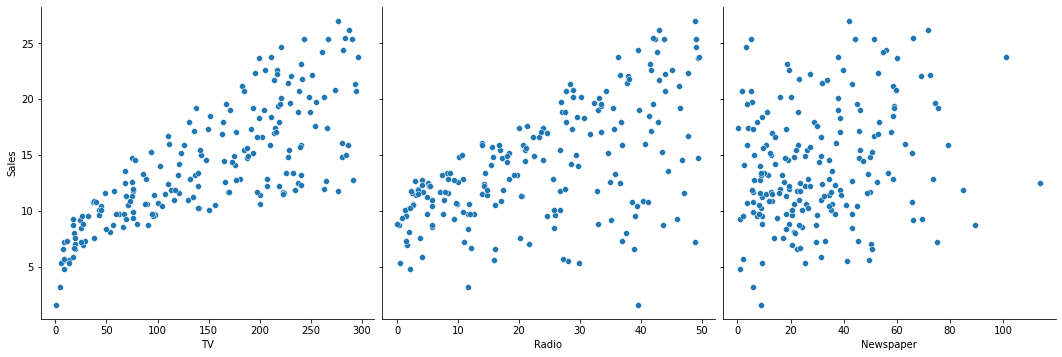

In [16]:
#Data Visualization
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 5, kind = 'scatter')
plt.show()

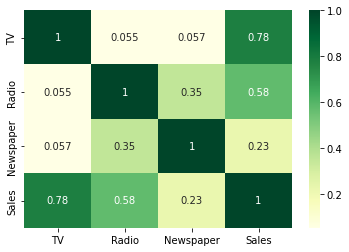

In [17]:
#using heatmap to find correlation
sns.heatmap(df.corr(), cmap = 'YlGn', annot = True)
plt.show()

In [18]:
## Selecting the independent variables from above findings
## Since this is lr model we chooese one independent variable
X = df['TV']
y = df['Sales']

In [19]:
X.shape

(200,)

In [20]:
#Analysing multicollinearity using Variance Inflation Factor(VIF)
## Using statsmodel python library
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_mc = df[['TV', 'Radio', 'Newspaper']]
vif = pd.DataFrame()
vif['Feature'] = X_mc.columns
vif['VIF'] = [variance_inflation_factor(X_mc.values, i) for i in range(len(X_mc.columns))]
vif
## IF VIF is between 1-5 then the variables are moderately correlated, hence we can consider all three variables
## Since TV has the least VIF we will use it in this project


,Feature,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


In [21]:
#Splitting data into train-validation-test 
## Split 70 - 15 - 15
## First split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = .85,shuffle = True, random_state = 142)
## Next split the data into train and split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1764, random_state = 142) #.85 * .1764 ~ .15



In [22]:
y_train

136     9.5
81     12.3
122    11.6
147    25.4
63     14.0
       ... 
156    15.3
172     7.6
77     14.2
87     16.0
7      13.2
Name: Sales, Length: 140, dtype: float64

In [23]:
## We need to reshape the X_train into a 2D array
X_train =  X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
X_val = X_val.values.reshape(-1,1)

In [24]:
# Instantiating the linear Regression model
lm = LinearRegression()

In [25]:
## Fitting the parameters
lm.fit(X_train, y_train)
# lm.get_params(deep = True)
print(lm.intercept_)
print(lm.coef_)

6.933873868577332
[0.04779633]


In [26]:
## Finding the predicted values of train, validation
y_train_pred = lm.predict(X_train)
y_val_pred = lm.predict(X_val)
## only use the test data after the values are improved
# y_test_pred = lm.predict(X_test)

In [27]:
## r2 score
print(r2_score(y_train, y_train_pred))
print(r2_score(y_val, y_val_pred))
## r2 value closer to .9 is good
## need to improve r2 score

0.6142298241540673
0.602864449194102


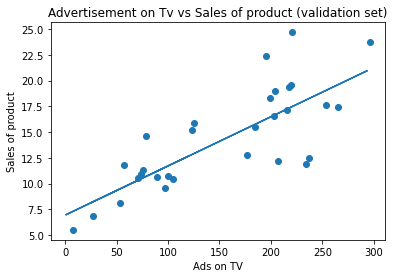

In [28]:
## creating a scatterplot for Validation dataset
plt.scatter(X_val, y_val)
plt.plot(X_train, lm.predict(X_train))
plt.title('Advertisement on Tv vs Sales of product (validation set)')
plt.xlabel('Ads on TV')
plt.ylabel('Sales of product')
plt.show()

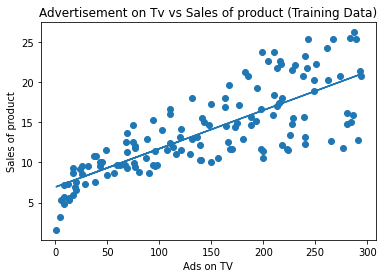

In [29]:
## Creating a scatterplot for training dataset
plt.scatter(X_train, y_train)
plt.plot(X_train, lm.predict(X_train))
plt.title('Advertisement on Tv vs Sales of product (Training Data)')
plt.xlabel('Ads on TV')
plt.ylabel('Sales of product')
plt.show()

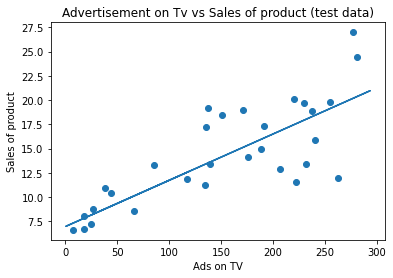

In [30]:
## scatterplot for test data
plt.scatter(X_test, y_test)
plt.plot(X_train, lm.predict(X_train))
plt.title('Advertisement on Tv vs Sales of product (test data)')
plt.xlabel('Ads on TV')
plt.ylabel('Sales of product')
plt.show()

In [36]:
# use of polyfit function to do simple linear regression
df


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [59]:
df['Total Spend'] = df['TV'] + df['Radio'] + df['Newspaper']
df

,TV,Radio,Newspaper,Sales,Total Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


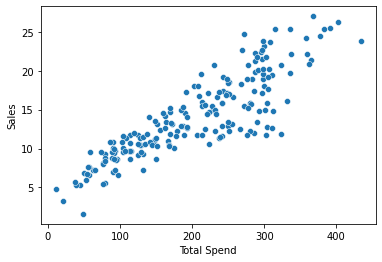

In [44]:
sns.scatterplot(x = 'Total Spend', y = 'Sales', data = df)
plt.show()
## Data show somewhat Linear correlation

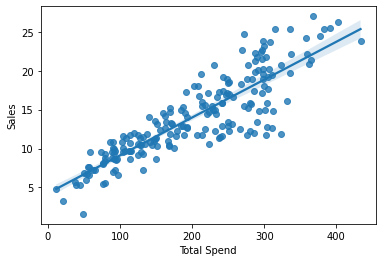

In [46]:
## Seaborn inbuilt linear regression fit plot
sns.regplot(x = 'Total Spend', y = 'Sales', data = df)
plt.show()

In [47]:
#Splitting the data
X1 = df['Total Spend']
y1 = df['Sales']
np.polyfit(X1, y1, deg = 1)
## polyfit gives us the slope and intercept of the linear regression
## In this case B1 =  0.04868788 and B0 = 4.24302822; 
## Linear equation is y = B1*x + B0

array([0.04868788, 4.24302822])

In [48]:
potential_spend = np.linspace(0,400,100)
y1_pred = 0.04868788*potential_spend + 4.24302822

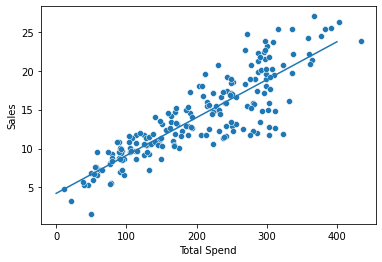

In [51]:
# Using the predicted linear regression in our plot
plt.plot(potential_spend, y1_pred)
sns.scatterplot(x = 'Total Spend', y = 'Sales', data = df)

In [64]:
X2 = df.iloc[:, 0:3]
y2 = df.iloc[:, -2]

In [70]:
# Train - Test split the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size = .2, random_state = 142) 

## Model fitting 
lr_model1 = LinearRegression()
lr_model1.fit(X_train1, y_train1)

## Prediction
y_train_pred1 = lr_model1.predict(X_train1)
y_pred1 = lr_model1.predict(X_test1)

In [72]:
## R2score method for model evaluation
r2_train =  r2_score(y_train1, y_train_pred1)
r2_test =  r2_score(y_test1, y_pred1)
print('r2 score of training set is;',r2_train)
print('r2 score of test set is:',r2_test)

r2 score of training set is; 0.8951281546097594
r2 score of test set is: 0.8999159153070782
